# Example 6:
In this example, strategies to find suitable fitting functions are discussed.

### KDE - Plotting the probability distribution in a "smooth" way.

Histograms just show "binned" data. For the interpretation of the inherent distribution, KDE provides are more clear insight into the probabiliy distribution by application of "Kernel-functions" (e.g. Gauss-distributions) for each data point. The Kernel functions are summed to create a smooth PDF.

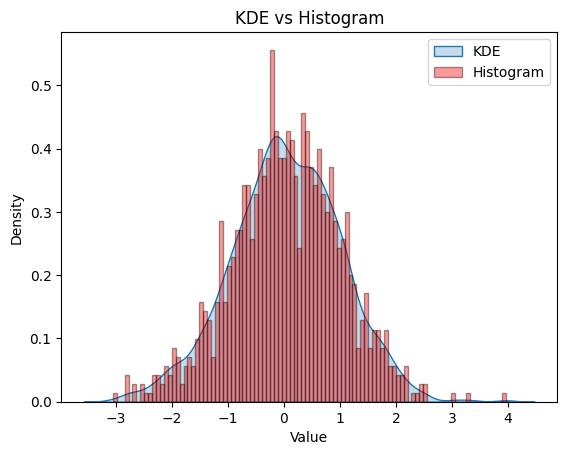

In [5]:
    #Using the KDE tool

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate raw data
np.random.seed(1)
raw_data = np.random.normal(loc=0, scale=1, size=1000)

# Plot KDE
sns.kdeplot(raw_data, bw_adjust=0.7, label="KDE", fill=True)

# Optional: Overlay histogram for comparison
plt.hist(raw_data, bins=100, density=True, facecolor='red', edgecolor='black', alpha=0.4, label="Histogram")

plt.legend()
plt.title("KDE vs Histogram")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

# Influence of bin width
# Influence of KDE bandwidth

### Fitting measures: KS Test

Once the distribution is visualized, analytical distribution function can be fitted to the data. In order to decide about the fitting quality, the "goodness of fit" needs to be determined.

The KS test provides such a qualitative measure. The used threshold of p=0.05 in the following example corresponds to a 5% risk of incorrectly rejecting the hypothesis (assumption: analytical PDF is suitable) when it is actually true. This threshold is a convention in many fields, but depending on the context, other significance levels (e.g., 0.01, 0.1) may be chosen.


KS Statistic: 0.017682984360866794
P-Value: 0.9076952866683186
Fail to Reject H0: Data follows the specified distribution


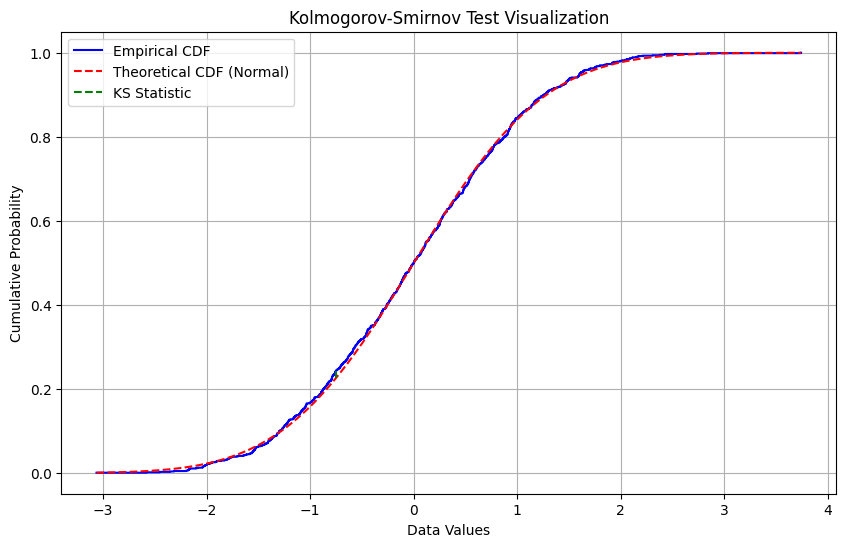

In [7]:
import numpy as np
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt

# Simulate data
data = np.random.normal(0, 1, 1000)

# Perform KS Test
ks_stat, p_value = kstest(data, 'norm', args=(0, 1))

print(f"KS Statistic: {ks_stat}")
print(f"P-Value: {p_value}")

# Decision
if p_value < 0.05:
    print("Reject H0: Data does not follow the specified distribution")
else:
    print("Fail to Reject H0: Data follows the specified distribution")

# Calculate ECDF based on data
data_sorted = np.sort(data)
ecdf = np.arange(1, len(data) + 1) / len(data)

# Theoretical CDF >> this is the assumed distribution
x = np.linspace(min(data_sorted), max(data_sorted), 1000)
theoretical_cdf = norm.cdf(x, loc=0, scale=1)

# Visualization
plt.figure(figsize=(10, 6))

# ECDF
plt.step(data_sorted, ecdf, where='post', label='Empirical CDF', color='blue')

# Theoretical CDF
plt.plot(x, theoretical_cdf, 'r--', label='Theoretical CDF (Normal)')

# Highlight KS Statistic
ks_index = np.argmax(np.abs(ecdf - norm.cdf(data_sorted, loc=0, scale=1)))
plt.vlines(data_sorted[ks_index], ymin=norm.cdf(data_sorted[ks_index], loc=0, scale=1), 
           ymax=ecdf[ks_index], color='green', linestyle='--', label='KS Statistic')

plt.title("Kolmogorov-Smirnov Test Visualization")
plt.xlabel("Data Values")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()

### Usage of the ''Fitter''-Tool

In case of uncertainity with respect to suitable fitting functions, the tool ca be used to test different distributions and to allow a decision. The fitter tool provides KS-Test statistics as a result.

2025-01-14 15:53:27.401 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.037797)
2025-01-14 15:53:27.415 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.01486)
2025-01-14 15:53:27.453 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=0.00236)
2025-01-14 15:53:27.459 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gumbel_r distribution with error=0.003603)
2025-01-14 15:53:27.488 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted weibull_min distribution with error=0.006341)


             sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm             0.002360  1378.079246  1392.802512     inf      0.016224   
gumbel_r            0.003603  1630.844256  1640.659766     inf      0.045815   
weibull_min         0.006341  1845.595352  1860.318617     inf      0.055936   
norm                0.014860  3026.153698  3035.969209     inf      0.114858   
expon               0.037797  1159.650365  1169.465876     inf      0.209812   

                ks_pvalue  
lognorm      9.511143e-01  
gumbel_r     2.911355e-02  
weibull_min  3.680123e-03  
norm         5.991810e-12  
expon        4.253879e-39  

Best Fit Distribution Based on Fitter:
{'lognorm': {'s': np.float64(0.5208586596612192), 'loc': 0.5455848040605571, 'scale': np.float64(9.478191540437695)}}

Kolmogorov-Smirnov Test for lognorm:
KS Statistic: 0.01622354095772577, P-Value: 0.9511143069574088


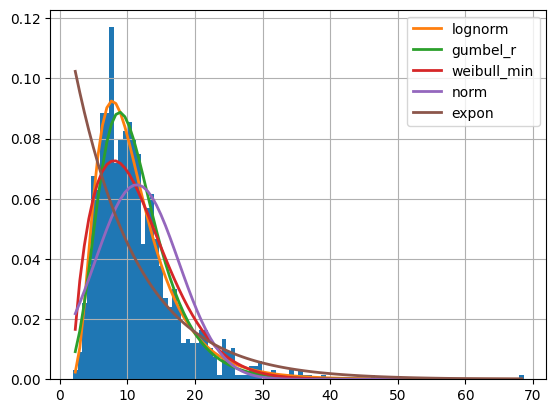

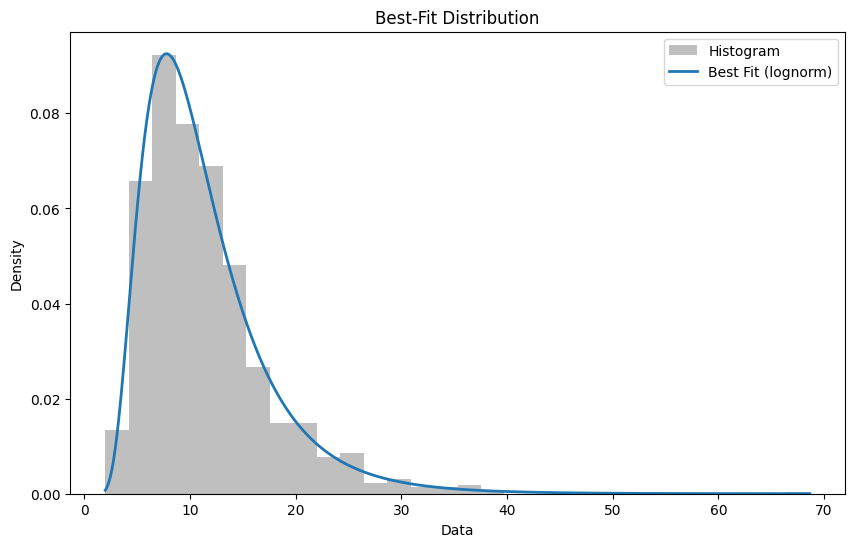

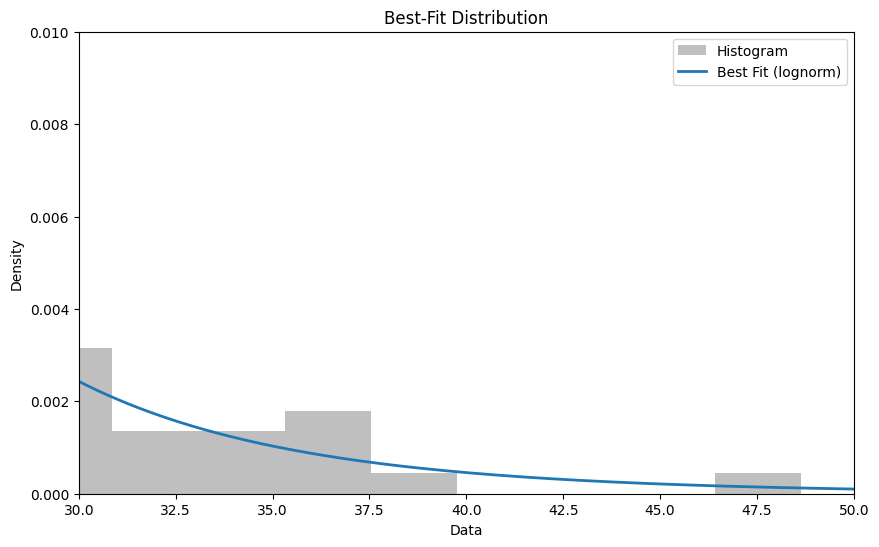

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, lognorm, kstest
from fitter import Fitter

# Step 1: Simulate Random Data
np.random.seed(42)
data = lognorm.rvs(s=0.5, loc=0, scale=10, size=1000)  # Lognormal distribution

# Step 2: Fit Distributions Using Fitter
f = Fitter(data, distributions=["norm", "expon", "lognorm", "gumbel_r", "weibull_min"])
f.fit()

# Display Summary of Fitter Results
print(f.summary())

# Step 3: Get Best Fit Based on AIC/BIC
best_fit = f.get_best(method="sumsquare_error")
print("\nBest Fit Distribution Based on Fitter:")
print(best_fit)

# Step 4: Goodness-of-Fit Test (Kolmogorov-Smirnov)
# Test the best-fit distribution
best_dist_name = list(best_fit.keys())[0]
best_params = best_fit[best_dist_name]

if best_dist_name == "lognorm":
    ks_stat, p_value = kstest(data, best_dist_name, args=(best_params["s"], best_params["loc"], best_params["scale"]))
else:
    ks_stat, p_value = kstest(data, best_dist_name, args=(best_params["loc"], best_params["scale"]))

print(f"\nKolmogorov-Smirnov Test for {best_dist_name}:")
print(f"KS Statistic: {ks_stat}, P-Value: {p_value}")

# Step 5: Visual Comparison
x = np.linspace(min(data), max(data), 1000)
pdf_data, bins = np.histogram(data, bins=30, density=True)
bins_center = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, color="gray", label="Histogram")
plt.plot(x, lognorm.pdf(x, *best_params.values()), label=f"Best Fit ({best_dist_name})", lw=2)
plt.xlabel("Data")
plt.ylabel("Density")
plt.title("Best-Fit Distribution")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, color="gray", label="Histogram")
plt.plot(x, lognorm.pdf(x, *best_params.values()), label=f"Best Fit ({best_dist_name})", lw=2)
plt.xlabel("Data")
plt.ylabel("Density")
plt.xlim([30,50])
plt.ylim([0,0.01])
plt.title("Best-Fit Distribution")
plt.legend()
plt.show()

2025-01-14 16:01:05.324 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.188122)
2025-01-14 16:01:05.333 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.878348)
2025-01-14 16:01:05.363 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gumbel_r distribution with error=0.050861)
2025-01-14 16:01:05.408 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=0.053048)
2025-01-14 16:01:05.413 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted weibull_min distribution with error=0.098724)


             sumsquare_error          aic          bic  kl_div  ks_statistic  \
gumbel_r            0.050861  1047.003232  1056.818743     inf      0.017654   
lognorm             0.053048   991.298076  1006.021342     inf      0.019282   
weibull_min         0.098724  1309.378353  1324.101619     inf      0.053380   
norm                0.188122  1966.969873  1976.785384     inf      0.086454   
expon               0.878348   727.250126   737.065636     inf      0.238296   

                ks_pvalue  
gumbel_r     9.086932e-01  
lognorm      8.439535e-01  
weibull_min  6.450016e-03  
norm         5.949583e-07  
expon        1.893529e-50  


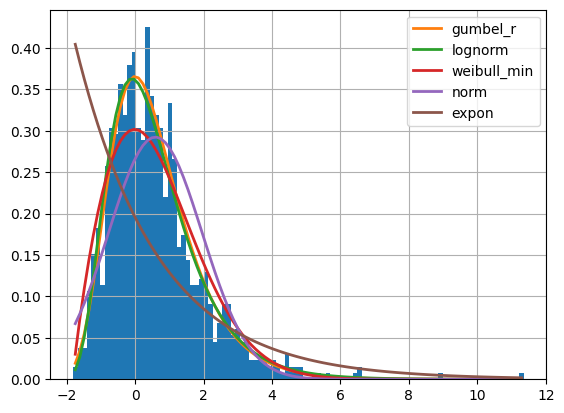

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, lognorm, kstest
from fitter import Fitter

# Step 1: Simulate Random Data
#np.random.seed(42)
#data = lognorm.rvs(s=0.5, loc=0, scale=10, size=1000)  # Lognormal distribution
data= np.random.gumbel(0, 1, 1000)

# Step 2: Fit Distributions Using Fitter
f = Fitter(data, distributions=["norm", "expon", "lognorm", "gumbel_r", "weibull_min"])
f.fit()

# Display Summary of Fitter Results
print(f.summary())



# Example with data of random loading (wind) 

/tmp/ipykernel_24414/3708974674.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


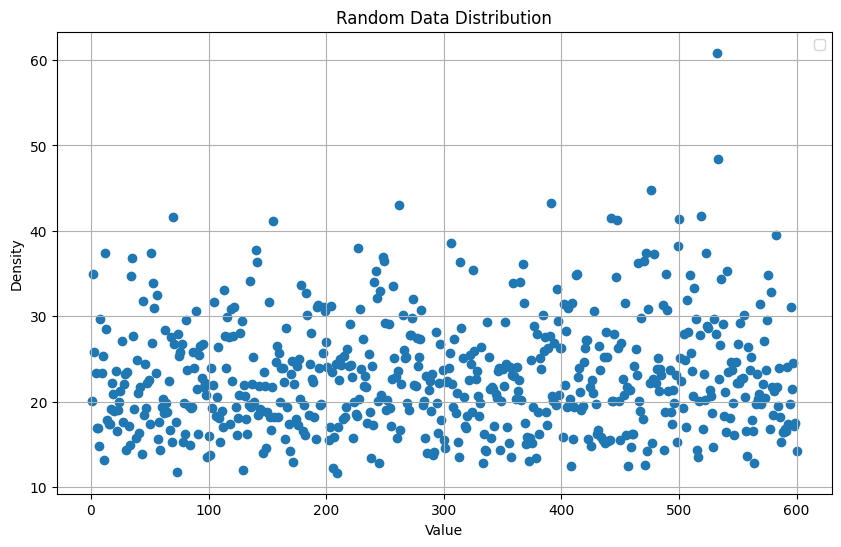

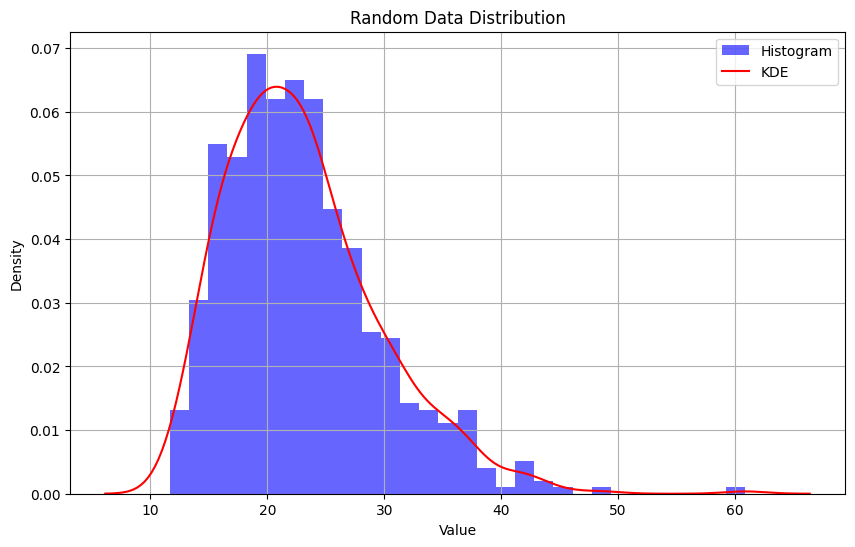

2025-01-14 16:06:51.443 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.010665)
2025-01-14 16:06:51.447 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=0.00589)
2025-01-14 16:06:51.449 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.039221)
2025-01-14 16:06:51.455 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gumbel_r distribution with error=0.005973)
2025-01-14 16:06:51.466 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted weibull_min distribution with error=0.006135)


Best-fit distribution: {'lognorm': {'s': np.float64(0.37437813225447564), 'loc': 5.658820207491798, 'scale': np.float64(16.183990334939622)}}


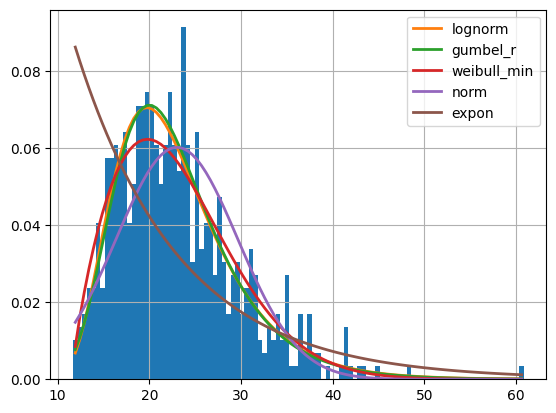

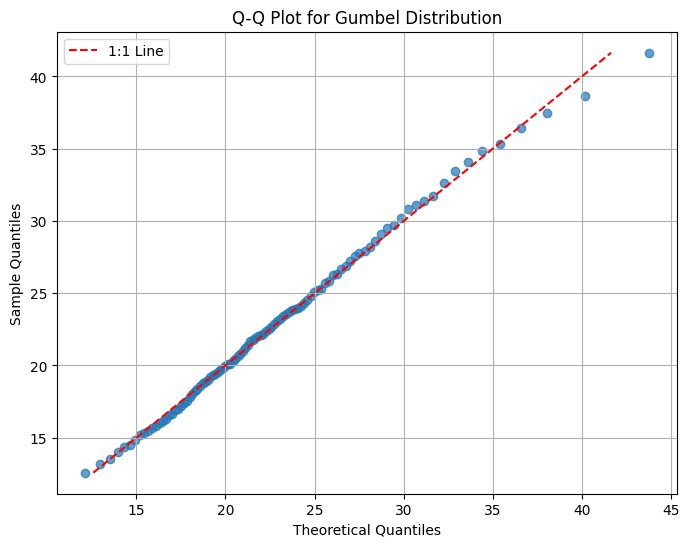

Characteristic value (98% quantile): 40.15
Gumbel 98% Quantile: 40.15
Normal 98% Quantile: 36.60
Weibull 98% Quantile: 39.01


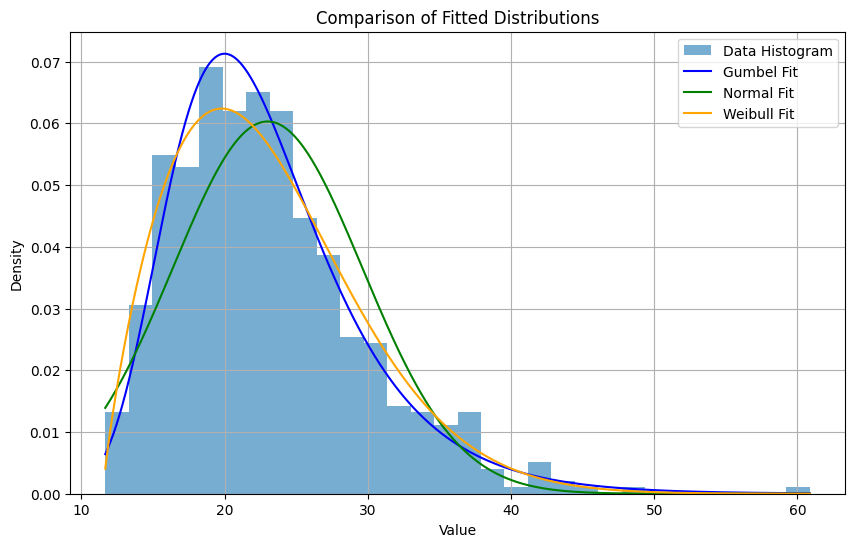

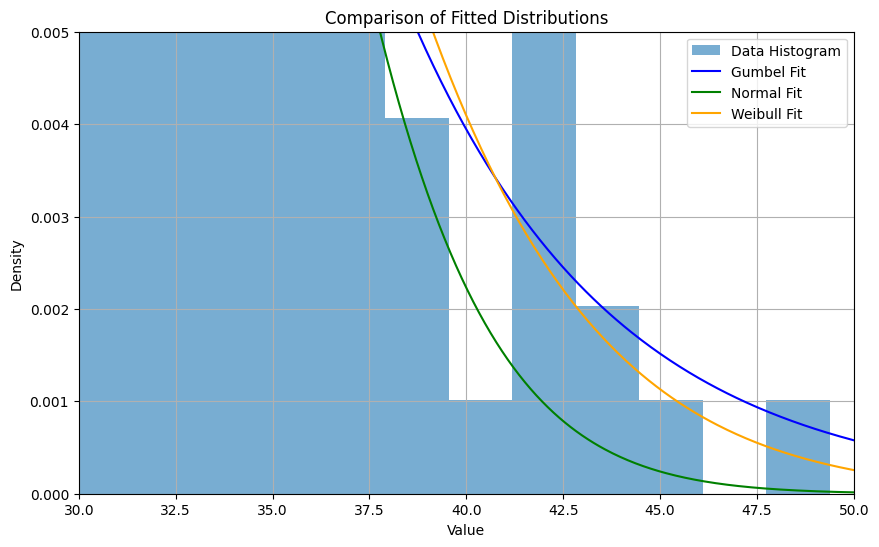

In [18]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from fitter import Fitter
import seaborn as sns

# Step 1: Generate or Load Random Data
# For demonstration, we generate random data resembling wind speeds
np.random.seed(42)
data = stats.gumbel_r.rvs(loc=20, scale=5, size=600)  # Gumbel distribution example
months= np.linspace(1,600,600)

# Step 2: Visualize the Data
plt.figure(figsize=(10, 6))
plt.scatter(months, data)
plt.title('Random Data Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Step 3: Visualize the Data as distribution
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', label="Histogram")
sns.kdeplot(data, color='red', label='KDE')

#KDE plot: Kernel density estimation


plt.title('Random Data Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Step 4: Hypothesis for Possible Distributions
# Using `fitter` library to identify the best-fit distribution
f = Fitter(data, distributions=["norm", "lognorm", "expon", "gumbel_r", "weibull_min"])
f.fit()
f.summary()

# Display the best-fit distribution
best_fit = f.get_best(method="sumsquare_error")
print(f"Best-fit distribution: {best_fit}")

# Step 5: Evaluate Fit (Q-Q Plot for Gumbel Distribution)
params = stats.gumbel_r.fit(data)  # Fit Gumbel distribution
theoretical_quantiles = np.linspace(0.01, 0.99, 100)
sample_quantiles = np.quantile(data, theoretical_quantiles)

plt.figure(figsize=(8, 6))
plt.scatter(stats.gumbel_r.ppf(theoretical_quantiles, *params), sample_quantiles, alpha=0.7)
plt.plot([min(sample_quantiles), max(sample_quantiles)],
         [min(sample_quantiles), max(sample_quantiles)],
         'r--', label="1:1 Line")
plt.title("Q-Q Plot for Gumbel Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.legend()
plt.grid()
plt.show()

# Step 6: Calculate Characteristic Value (98% Quantile)
characteristic_value = stats.gumbel_r.ppf(0.98, *params)
print(f"Characteristic value (98% quantile): {characteristic_value:.2f}")

# Step 7: Validation with Other Distributions
# Fitting Normal and Weibull distributions
params_norm = stats.norm.fit(data)
params_weibull = stats.weibull_min.fit(data)
params_lognorm = stats.lognorm.fit(data)

# Compute 98% quantiles for all
quantile_gumbel = stats.gumbel_r.ppf(0.98, *params)
quantile_norm = stats.norm.ppf(0.98, *params_norm)
quantile_weibull = stats.weibull_min.ppf(0.98, *params_weibull)

print(f"Gumbel 98% Quantile: {quantile_gumbel:.2f}")
print(f"Normal 98% Quantile: {quantile_norm:.2f}")
print(f"Weibull 98% Quantile: {quantile_weibull:.2f}")

# Step 8: Compare Visualizations
x = np.linspace(min(data), max(data), 1000)
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, label="Data Histogram")
plt.plot(x, stats.gumbel_r.pdf(x, *params), label="Gumbel Fit", color="blue")
plt.plot(x, stats.norm.pdf(x, *params_norm), label="Normal Fit", color="green")
plt.plot(x, stats.weibull_min.pdf(x, *params_weibull), label="Weibull Fit", color="orange")
plt.title("Comparison of Fitted Distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# Step 9: Compare Visualizations (more zoomed in)
x = np.linspace(min(data), max(data), 1000)
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, label="Data Histogram")
plt.plot(x, stats.gumbel_r.pdf(x, *params), label="Gumbel Fit", color="blue")
plt.plot(x, stats.norm.pdf(x, *params_norm), label="Normal Fit", color="green")
plt.plot(x, stats.weibull_min.pdf(x, *params_weibull), label="Weibull Fit", color="orange")
plt.title("Comparison of Fitted Distributions")
plt.xlim([30,50])
plt.ylim([0,0.005])
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


# Example: Probability of Snow in Aachen

In this example we make use of real data, provided by the German Meteorological Service (DWD) for snow heights, or rather "water equivalents".

Data available under:
https://cdc.dwd.de/portal/202209231028/
Search for "Snow cover water equivalent"

or directly:

Historical data for water equivalent:
https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/water_equiv/historical/





This example is for waether station "Aachen", Station Number 00003.

To create a suitable import function, I used ChatGPT: "i have this csv-file, how to open it in python?"


In [9]:
#Open the data file

import pandas as pd

# Replace 'your_file.csv' with the path to your tab-separated CSV file
file_path = '/workspaces/PDMSS/produkt_waequi_tag_19360118_20110106_00003.csv'

# Read the tab-separated CSV file
data = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the data
print(data.head())



   STATIONS_ID  MESS_DATUM  QN_6  ASH_6  SH_TAG  WASH_6  WAAS_6  eor
0            3    19360118     5   -999       4     3.2  -999.0  eor
1            3    19360119     5   -999       0  -999.0  -999.0  eor
2            3    19360120     5   -999       0  -999.0  -999.0  eor
3            3    19360121     5   -999       0  -999.0  -999.0  eor
4            3    19360122     5   -999       0  -999.0  -999.0  eor


Next is, to get data and filter by time:

ChatGPT:
"ok, looks like this now: STATIONS_ID  MESS_DATUM  QN_6  ASH_6  SH_TAG  WASH_6  WAAS_6  eor
0         3339    20070323     9      8       8    24.0    24.0  eor
1         3339    20070324     9   -999       5  -999.0  -999.0  eor
2         3339    20070325     9   -999       0  -999.0  -999.0  eor
3         3339    20070326     9   -999    -999  -999.0  -999.0  eor
4         3339    20070327     9   -999    -999  -999.0  -999.0  eor

How can I get the SH_Tag for each months?"

In [10]:
# Convert the `MESS_DATUM` column to datetime
data['MESS_DATUM'] = pd.to_datetime(data['MESS_DATUM'], format='%Y%m%d')

# Extract the year and month for grouping
data['YearMonth'] = data['MESS_DATUM'].dt.to_period('M')

# Group by the YearMonth and calculate the desired statistics for `SH_TAG`
# For example, calculate the mean, ignoring -999 values
filtered_data = data[data['SH_TAG'] != -999]  # Exclude invalid values
monthly_stats = filtered_data.groupby('YearMonth')['SH_TAG'].max()

# Print the result
print(monthly_stats)



YearMonth
1936-01     4
1936-02     2
1936-03     0
1936-04     0
1936-05     0
           ..
2010-09     0
2010-10     0
2010-11     6
2010-12    37
2011-01    24
Freq: M, Name: SH_TAG, Length: 888, dtype: int64


ChatGPT: "nice. how can i plot the values over time?"

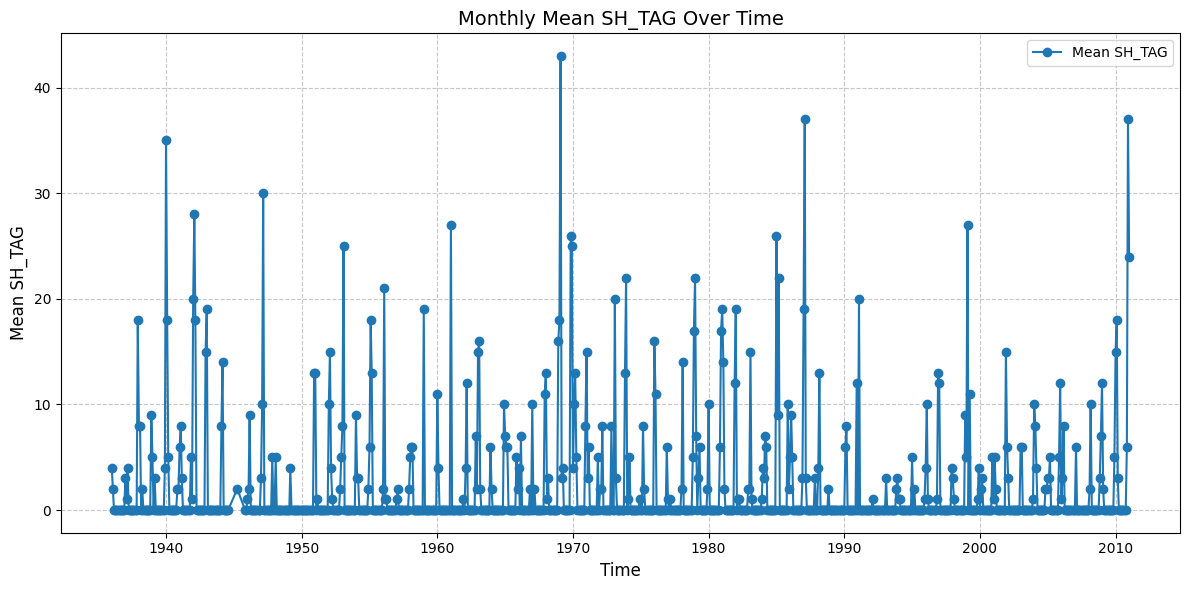

In [11]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 6))
monthly_stats.index = monthly_stats.index.to_timestamp()  # Convert to datetime for plotting
plt.plot(monthly_stats.index, monthly_stats.values, marker='o', linestyle='-', label='Mean SH_TAG')

# Customize the plot
plt.title('Monthly Mean SH_TAG Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Mean SH_TAG', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

Let's check the distribution.

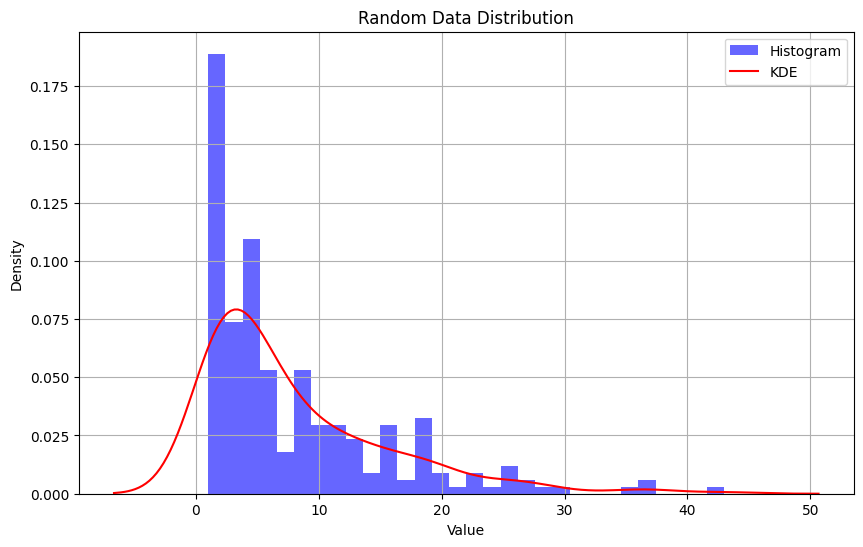

2025-01-14 16:47:20.976 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.310827)
2025-01-14 16:47:20.984 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.229961)
2025-01-14 16:47:20.990 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gumbel_r distribution with error=0.281321)
2025-01-14 16:47:21.013 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=0.316424)
2025-01-14 16:47:21.064 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted weibull_min distribution with error=0.214658)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
weibull_min,0.214658,948.320237,958.787051,inf,0.119835,1.740823e-03
expon,0.229961,994.129335,1001.107210,inf,0.131048,4.390377e-04
gumbel_r,0.281321,1091.695211,1098.673086,inf,0.140499,1.248186e-04
norm,0.310827,1182.714850,1189.692725,inf,0.197446,9.634524e-09
lognorm,0.316424,1261.212088,1271.678901,inf,0.473985,1.930796e-50


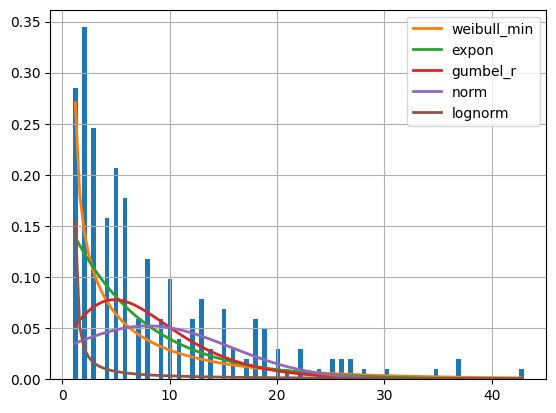

In [15]:
from fitter import Fitter
import seaborn as sns

#monthly_stats.index, monthly_stats.values,
data=monthly_stats.values[monthly_stats.values>0] #exclude days without snow

# Step 3: Visualize the Data as distribution
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', label="Histogram")
sns.kdeplot(data, color='red', label='KDE')

#KDE plot: Kernel density estimation
plt.title('Random Data Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Step 4: Hypothesis for Possible Distributions
# Using `fitter` library to identify the best-fit distribution
f = Fitter(data, distributions=["norm", "lognorm", "expon", "gumbel_r", "weibull_min"])
f.fit()
f.summary()

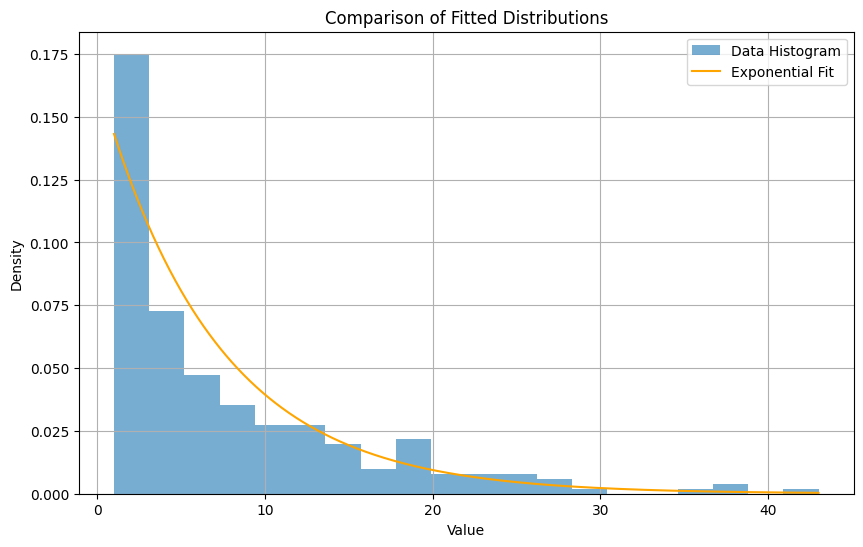

In [19]:
import scipy.stats as stats
import numpy as np

#Looks like exponential fit is not too bad, lets check in detail

params_expon = stats.expon.fit(data) 

# Step 8: Compare Visualizations
x = np.linspace(min(data), max(data), 1000)
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, density=True, alpha=0.6, label="Data Histogram")
plt.plot(x, stats.expon.pdf(x, *params_expon), label="Exponential Fit", color="orange")
plt.title("Comparison of Fitted Distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()